# Wilcoxon signed rank test

**date** : 2021-04-17

**aim** : Perform a Wilcoxon signed rank test.

**reference** : M248, computer book B, chapter 10

**packages ** : `scipy`

**note** : **M248** stipulates that the test statistic $W_{+}$ is always the sum of the ranks of the *positive differences.*
However `scipy.stats.wilcoxon()` returns the **min**$(w_{-}, w_{+})$.
The overall conclusion should be that same, but the test statistic and $p$-value may not be equal to the one expected by **M248**.

## 1. Setup the notebook

In [1]:
from src import load
from scipy.stats import wilcoxon, probplot
import seaborn as sns
import matplotlib.pyplot as plt

## 2. One sample of differences

**aim** : Test the hypotheis $H_{0} : m = 0, \> m \neq 0$, where $m$ is the underlying population median difference between pre-test and post-test foetal movements. (See description.)

**reference** : activity 36

**data** : movements.csv

**description** : Differences in the percentage time a foetus moves before a test procedure was performed and the percentage of time it was moving afterwards.

### 2.1 Import the data

In [2]:
# import the data
diff = load.movements()["Diff"]

### 2.2 Visualise the data

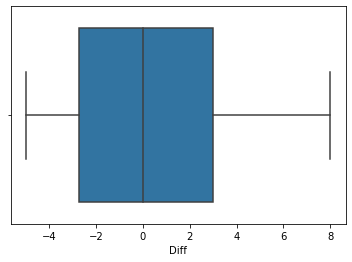

In [3]:
sns.boxplot(x=diff)
plt.show()

### 2.3 Normal probability plot

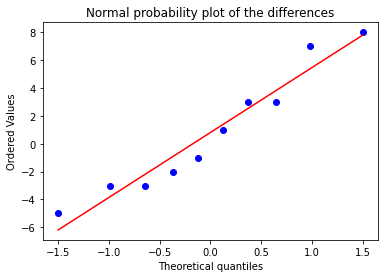

In [4]:
ax = plt.subplot()
probplot(diff, plot=ax)
ax.set(title="Normal probability plot of the differences")
plt.show()

The points lie roughly along a straight-line.
This suggests a normal model is plausible for the difference in percentage time a foetus spends moving pre- and post-test.

### 2.4 Perform the Wilcoxon signed rank test

In [5]:
wilcoxon(x=diff)

WilcoxonResult(statistic=23.5, pvalue=0.76953125)

Given $p >$ 0.1, there is little to no evidence against the null hypothesis that the population median difference between percentages of time a foetus spends moving pre- and post-test are zero.

## 3. Two samples

**aim** : Test the hypothesis $H_{0} : m_{A} = m_{B}, \> m_{A} > m_{B}$, where $m_{A}, \> m_{B}$ are the underlying population medians of the number of lesions found on each half of the leaf after being coated by the two different virus preparations. (See description.)

**reference:** activity 37.

**note** : methodology differs to how the activity is carried out in the text.
Here we use the two samples of data directly, rather than using a single sample of the calculated differences.

**data:** lesions.csv

**description:** Numbers of local lesions appearing on each half of eight leaves, after being rubbed by two preparations of different viruses.

### 3.1 Import the data

In [6]:
# import the data
lesions = load.lesions()

In [7]:
# assign local vars
a = lesions["Alesions"]
b = lesions["Blesions"]

### 3.2 Visualise the data

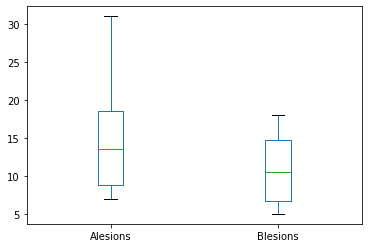

In [8]:
lesions.plot(kind="box")
plt.show()

### 3.3 Normal probability plot

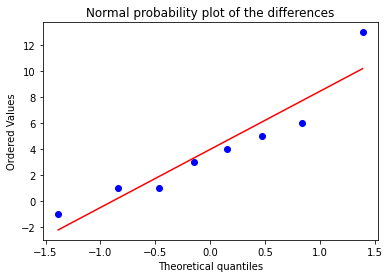

In [9]:
ax = plt.subplot()
probplot(a-b, plot=ax)
ax.set(title="Normal probability plot of the differences")
plt.show()

The points lie mostly along a straight-line.
However, the point for the difference of 13 lies someway away from the line, so it maybe an outlier.

### 3.4 Perform the Wilcoxon signed rank test

In [10]:
wilcoxon(x=a, y=b, alternative="greater")

WilcoxonResult(statistic=34.0, pvalue=0.01171875)

Gven $p \in$ (0.01, 0.05], there is moderate evidence against the null hypothesis.
The data indicates that the median difference in lesion counts is greater than zero; that is it leads to the conclusion that there is moderate to support the claim that virus A leads to more lesions on leaves than virus B.

It should be noted that that the sample size of $n=$8 is quite small, so the $p$-value given in the the test may not be that reliable.
Also, the outlier in the normal probability plot undermines the assumption of symmetry in the underlying population.